# importing libraries

In [25]:
import tests_correl as tc
import projection as pj

import os, shutil
import pandas as pd
import numpy as np
import urllib.request as request
from contextlib import closing
import matplotlib.pyplot as plt
import glob
import datetime as dt

# Image download

In [26]:
def batch_download(directory, PM10_path):
    class_AOT = ["AOT_inf_50", "AOT_sup_50", "AOT_sup_100", "AOT_sup_150"]
    i = 0 # counter for images not available in the FTP sever
   
    for folder in class_AOT:
        
        #set working directory
        wd = os.path.join(directory, folder)
        if not os.path.exists(wd):
            os.mkdir(wd)
        os.chdir(wd)
        
        #open table
        tab_path = os.path.join(PM10_path, "tableau_pics_mean_%s.xlsx"%(folder))
        df = pd.read_excel(tab_path)
        arr = df.to_numpy()
        for dateAOT in arr[:,1]:
            date_str = dateAOT.strftime("%Y%m%d") # convert datetime format to date string
            
            #set url from where to download files 
            url = "ftp://ftp.star.nesdis.noaa.gov/pub/smcd/VIIRS_Aerosol/viirs_aod_gridded/idps/snpp/edraot550/"
            file = "npp_aot550_edr_gridded_0.25_%s.high.bin.gz"%date_str
            link = url + date_str[:4] + "/" + file
           
            try : 
                with closing(request.urlopen(link)) as r:
                    with open(file, 'wb') as f:
                        """
                        Create condition of cloud cover and data availability over ROI
                        """
                        shutil.copyfileobj(r, f)
                        print("An image was found for this date : %s"%(date_str))
                        continue
            except:
                i +=1
                print("No image were found for this date : %s."%(date_str))
                continue
            
    print("Number of image not found for %s : "%(folder), i)

In [27]:
batch_download("C:/Users/Baptiste/Documents/ENSG/stage/result", "C:/Users/Baptiste/Documents/ENSG/stage/pic_mean_AOT")

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:/Users/Baptiste/Documents/ENSG/stage/result\\AOT_inf_50'

# Main

In [28]:
#set working directory and import dataset
year = "2018"
wd ='..\\data\\pic_mean_AOT'
result_dir ="../data/Results"
classes = ["AOT_sup_150", "AOT_sup_100", "AOT_inf_50", "AOT_sup_50"]
stations_ATMO = ["Cayenne"] 
stations_AERONET = ["Paracou","Nouragues","Surinam"]

#define your area of interest according to the name of the station
for station in stations_ATMO:
    if station == "Cayenne":
        Lat = 4.933351
        Lon = -52.310793
    elif station == "Kourou":
        Lat = 5.163618
        Lon = -52.645549
    elif station == "Matoury":
        Lat = 4.848194 
        Lon = -52.323817
    else:
        print("The name of the station is probably wrong.")
        
#predefined objects   
lons, lats = tc.LonLat() # create matrix of lon and lat informations
# lons = cv2.resize(lons, (2880,1440), interpolation = cv2.INTER_NEAREST)
# lats = cv2.resize(lats, (2880,1440), interpolation = cv2.INTER_NEAREST)
x, y = tc.retrieve_PointCoordinates(lons, lats, Lat, Lon) # retrieves the 
print("Latitude %s corresponds to x = %s in the matrix./nLongitude %s corresponds to y = %s in the matrix."%(Lat,x,Lon,y)) # display the coordinates in the matrix of the station


Latitude 4.933351 corresponds to x = 379 in the matrix./nLongitude -52.310793 corresponds to y = 510 in the matrix.


In [ ]:
f_list = glob.glob("../data/AOT_inf_50_dezip/*/*.bin")
print(f_list[0])
#tc.open_bin(f_list[0])
binfile = r"C:\Users\Baptiste\Documents\ENSG\stage\data\AOT_inf_50_dezip\npp_aot550_edr_gridded_0.25_20120622.high.bin\npp_aot550_edr_gridded_0.25_20120622.high.bin"
imnp = np.fromfile(binfile, dtype = np.single) # type : single precision float
imnp2 = np.fromfile(binfile, dtype = np.int_)
print(np.shape(imnp))
print(np.shape(imnp2))
tc.open_bin(binfile)
aot_edr, n_aot_edr = tc.open_bin(filename)

../data/AOT_inf_50_dezip\npp_aot550_edr_gridded_0.25_20120622.high.bin\npp_aot550_edr_gridded_0.25_20120622.high.bin
(2073600,)
(2073600,)


(masked_array(
   data=[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ...,

In [ ]:
print(np.__version__)

1.22.3


C:\Users\Baptiste\AppData\Local\Temp\ipykernel_12460\2628722248.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date" : date.date(), "AOT EDR 550 nm" : aot_edr[x-3,y],


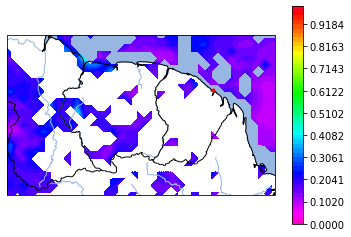

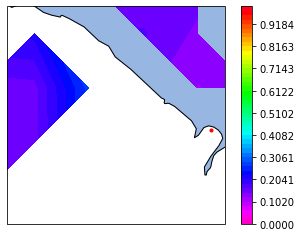

C:\Users\Baptiste\AppData\Local\Temp\ipykernel_12460\2628722248.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Date" : date.date(), "AOT EDR 550 nm" : aot_edr[x-3,y],


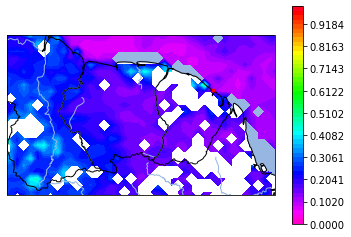

KeyboardInterrupt: 

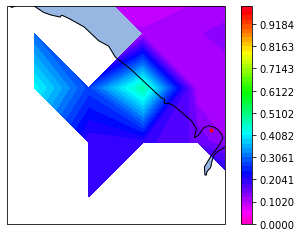

In [ ]:
# 1ST PART : EXTRACTION OF AOT, SCATTER AOT AND NAOT, PROJECT DATA

for station in stations_ATMO:
    
    # create a Dataframe containing the date, the aot_edr value and n_AOT
    df = pd.DataFrame(columns = ["Date", "AOT EDR 550 nm", "nAOT"])
   
    for c in classes: # "AOT_sup_150", "AOT_sup_100", "AOT_inf_50", "AOT_sup_50"
        
        #set direction to the folder
        class_dir = os.path.join(wd, f"tableau_pics_mean_{c}.xlsx")
        f_list = glob.glob("../data/AOT_inf_50_dezip/*/*.bin") # look for the files to open
        result_file = os.path.join(result_dir) #define the folder where the results will be saved 

        #append to a dataframe date of the tiles and their corresponding AOT and nAOT values
        for filename in f_list:
            aot_edr, n_aot_edr = tc.open_bin(filename) #open .high.bin file
            
            # aot_edr = cv2.resize(aot_edr, (2880,1440), interpolation = cv2.INTER_NEAREST) #nearest neighbor interpolation to resample the array and get a specific AOT value for Cayenne not influenced by ocean reflectance
            # n_aot_edr = cv2.resize(n_aot_edr, (2880,1440), interpolation = cv2.INTER_NEAREST)
            # aot_edr = ma.masked_where(aot_edr == -9999, aot_edr)
            # n_aot_edr = ma.masked_where(n_aot_edr < -100, n_aot_edr)
            
            #research date, AOT and nAOT values for the second pair of coordinates 
            ##given by the retrieve_PointCoordinates function.
            date = dt.datetime.strptime(filename[-17:-9], '%Y%m%d')
            df = df.append({"Date" : date.date(), "AOT EDR 550 nm" : aot_edr[x-3,y],
                            "nAOT" : n_aot_edr[x-3,y]}, ignore_index = True)
            #project AOT data over ROI (Region of Interest) : decomment the 3 following lines if you want to project
            pj.projection(result_file, aot_edr, "Gridded AOT EDR 550 nm", date.date(), station, Lon, Lat, lons, lats, planisphere=False, Kourou_subregion=False, Matoury_subregion=False, StGeorges_subregion=False, Guadeloupe_subregion=False)


        """
        # df.drop_duplicates(subset = "Date", keep = 'first', inplace = True)    
        df.to_excel("aot_edr_df_%s_%s.xlsx"%(station, c))
        #after saving the dataframe, you have to open it in excel and convert 
        ##it to the right format (put write separator : ",") if it is not
        ##In excel : go to Data>Convert and choose "," separator
        """ 

    """
    #plot 3 axes 
    df2np = df.to_numpy() # convert dataframe to numpy array
    tc.axes3_plot(df2np[:,0], df2np[:,1], df2np[:,2], title = "Gridded AOT EDR at 550 nm over %s"%(station))
    plt.savefig(os.path.join(result_dir, "AOT_nAOT_%s.png"%(station)))
    #del df, aot_edr, n_aot_edr, filename, f_list
    """

In [ ]:
df

,Date,AOT EDR 550 nm,nAOT
0,2012-06-22,--,0


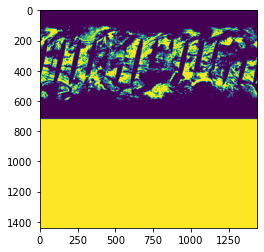

In [ ]:
for file in f_list:
    image=np.fromfile(file,dtype=np.single)
    nBpixel=len(image)
    nbcol=int(np.sqrt(nBpixel))
    array=np.reshape(image,(nbcol,nbcol))
plt.imshow(array)
    